# CAPSTONE - BATTLE OF THE NEIGHBORHOODS

We'll first build the four datasets, then perform a complete analysis for each of the four cities (one after another), then do a bit of work on a merged database to see how the clustering is changing and to perform some comparison.

In [4]:
import pandas as pd

Building datasets

In [90]:
# The code was removed by Watson Studio for sharing.

,City,Borough,Latitude,Longitude
0,Rome,Historical centre,41.89,12.49
1,Rome,Parioli Nomentano,41.92,12.50
2,Rome,Monte Sacro,41.96,12.52
3,Rome,Tiburtana,41.92,12.56
4,Rome,Prenestino Centocelle,41.90,12.56
5,Rome,Roma delle torri,41.88,12.57
6,Rome,Appio Latino,41.86,12.55
7,Rome,Appia antica,41.84,12.52
8,Rome,Business District,41.96,12.42


In [91]:
# The code was removed by Watson Studio for sharing.

,City,Borough,Latitude,Longitude
0,Paris,Louvre,48.8592,2.3417
1,Paris,Bourse,48.8655,2.3426
2,Paris,Temple,48.8637,2.3415
3,Paris,Hotel de Ville,48.8601,2.3507
4,Paris,Pantheon,48.8448,2.3471
5,Paris,Luxembourg,48.8493,2.3300
6,Paris,Palais Bourbon,48.8565,2.3210
7,Paris,Elysees,48.8763,2.3183
8,Paris,Opera,48.8718,2.3399
9,Paris,Entrepot,48.8709,2.3561


In [92]:
# The code was removed by Watson Studio for sharing.

,City,Borough,Latitude,Longitude
0,London,London City,51.5155,-0.0922
1,London,Camden,51.5290,-0.1255
2,London,Greenwich,51.4892,-0.0648
3,London,Hackney,51.5450,-0.0553
4,London,Hammersmith and Fulham,51.4927,-0.2339
5,London,Haringey,51.6000,-0.1119
6,London,Islington,51.5416,-0.1022
7,London,Kensington and Chelsea,51.5020,-0.1947
8,London,Lambeth,51.4607,-0.1163
9,London,Levisham,51.4452,-0.0209


In [155]:
# The code was removed by Watson Studio for sharing.

,City,Borough,Latitude,Longitude
0,Barcelona,Ciutat Vella,41.382700,2.183185
1,Barcelona,Eixample,41.383700,2.152700
2,Barcelona,Sants Montjuic,41.353600,2.143800
3,Barcelona,Les Corts,41.389000,2.133000
4,Barcelona,Sarria Sant Gervasi,41.402700,2.116700
5,Barcelona,Gracia,41.401100,2.157800
6,Barcelona,Horta Guinardo,41.421600,2.164055
7,Barcelona,Nou Barris,41.444743,2.178422
8,Barcelona,Sant Andreu,41.435700,2.194700
9,Barcelona,Sant Marti,41.408387,2.200759


In [9]:
import numpy as np
import json # library to handle JSON files
# Matplotlib and associated plotting modules
%matplotlib inline
import matplotlib as  mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans

In [10]:
# The code was removed by Watson Studio for sharing.

## ROME

In [11]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

#Use geopy library to get the latitude and longitude values of Rome
Rome_address = 'Rome, Italy'
Rome_geolocator = Nominatim(user_agent="rome_explorer")
Rome_location = Rome_geolocator.geocode(Rome_address)
Rome_latitude = Rome_location.latitude
Rome_longitude = Rome_location.longitude
print('The geographical coordinate of Rome are {}, {}.'.format(Rome_latitude, Rome_longitude))

The geographical coordinate of Rome are 41.8933203, 12.4829321.


In [12]:
import requests

Rome_venues = []

for city, borough, lat, long in zip(rome_df['City'], rome_df['Borough'], rome_df['Latitude'], rome_df['Longitude']):
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        radius, 
        LIMIT)
    
    Rome_results = requests.get(url).json()['response']['groups'][0]['items']
    
    for venue in Rome_results:
        Rome_venues.append((
            city, 
            borough,
            lat, 
            long, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))

In [13]:
Rome_venues = pd.DataFrame(Rome_venues)
Rome_venues.columns = ['City', 'Borough', 'BoroughLatitude', 'BoroughLongitude', 'VenueName', 'VenueLatitude', 'VenueLongitude', 'VenueCategory']
print(Rome_venues.shape)
Rome_venues.head()

(900, 8)


,City,Borough,BoroughLatitude,BoroughLongitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,Rome,Historical centre,41.89,12.49,Colosseo,41.890633,12.492378,Historic Site
1,Rome,Historical centre,41.89,12.49,Tempio del Divo Romolo,41.891863,12.487126,Temple
2,Rome,Historical centre,41.89,12.49,Farnese Gardens,41.889928,12.485716,Garden
3,Rome,Historical centre,41.89,12.49,Palatino,41.888234,12.487209,Historic Site
4,Rome,Historical centre,41.89,12.49,Arco di Tito,41.890649,12.488537,Monument / Landmark


Let's see which venues are the most common ones.

In [16]:
# The code was removed by Watson Studio for sharing.

In [17]:
# install wordcloud
!conda install -c conda-forge wordcloud==1.4.1 --yes

# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - wordcloud==1.4.1


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    wordcloud-1.4.1            |           py36_0         324 KB  conda-forge
    openssl-1.1.1h             |       h516909a_0         2.1 MB  conda-forge
    certifi-2020.11.8          |   py36h5fab9bb_0         150 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ca-certificates-2020.11.8  |       ha878542_0         145 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.7 MB

The following NEW packages will be INSTALLED:

    python_abi:      3.6-1_cp36m            conda-forge
    wordcloud:       1.4.1-py36_0           conda-forge

The following packages will

In [18]:
stopwords = set(STOPWORDS)

In [45]:

# instantiate a word cloud object
Rome_wc = WordCloud(
    background_color='yellow',
    max_words=1000,
    stopwords=stopwords
)

# generate the word cloud
Rome_wc.generate(RomeText)

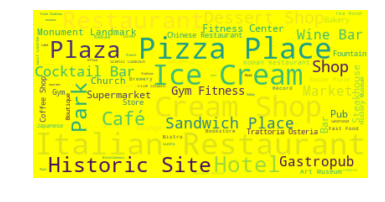

In [46]:
# display the word cloud
plt.imshow(Rome_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [18]:
Rome_venues.groupby('VenueCategory').count() 

,City,Borough,BoroughLatitude,BoroughLongitude,VenueName,VenueLatitude,VenueLongitude
VenueCategory,,,,,,,
Airport,1,1,1,1,1,1,1
Argentinian Restaurant,2,2,2,2,2,2,2
Art Museum,9,9,9,9,9,9,9
Asian Restaurant,1,1,1,1,1,1,1
Auditorium,2,2,2,2,2,2,2
Bagel Shop,1,1,1,1,1,1,1
Bakery,9,9,9,9,9,9,9
Bar,10,10,10,10,10,10,10
Beer Bar,1,1,1,1,1,1,1


In [22]:
sub_df = Rome_venues[Rome_venues['VenueCategory'] == 'Ice Cream Shop']
len(sub_df) 

75

In [23]:
sub_df1 = Rome_venues[Rome_venues['VenueCategory'] == 'Pizza Place']
len(sub_df1)

80

In [24]:
sub_df2 = Rome_venues[Rome_venues['VenueCategory'] == 'Garden']
len(sub_df2)

3

In [25]:
sub_df3 = Rome_venues[Rome_venues['VenueCategory'] == 'Park']
len(sub_df3)

36

In [27]:
sub_df = Rome_venues[Rome_venues['VenueCategory'] == 'Trail']
len(sub_df)

0

In [29]:
sub_df4 = Rome_venues[Rome_venues['VenueCategory'] == 'Monument / Landmark']
len(sub_df4)

13

In [30]:
sub_df4 = Rome_venues[Rome_venues['VenueCategory'] == 'Church']
len(sub_df4)

12

In [31]:
sub_df4 = Rome_venues[Rome_venues['VenueCategory'] == 'Art Museum']
len(sub_df4)

9

In [32]:
sub_df4 = Rome_venues[Rome_venues['VenueCategory'] == 'Art Gallery']
len(sub_df4)

0

In [33]:
sub_df4 = Rome_venues[Rome_venues['VenueCategory'] == 'Historic Site']
len(sub_df4)

37

In [35]:
sub_df4 = Rome_venues[Rome_venues['VenueCategory'] == 'Fountain']
len(sub_df4)

9

In [36]:
sub_df4 = Rome_venues[Rome_venues['VenueCategory'] == 'Italian Restaurant']
len(sub_df4)

80

In [37]:
sub_df4 = Rome_venues[Rome_venues['VenueCategory'] == 'French Restaurant']
len(sub_df4)

3

In [43]:
Rome_venues[(Rome_venues['VenueCategory']=='Garden') | (Rome_venues['VenueCategory'] == 'Park')]

,City,Borough,BoroughLatitude,BoroughLongitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
2,Rome,Historical centre,41.89,12.49,Farnese Gardens,41.889928,12.485716,Garden
18,Rome,Historical centre,41.89,12.49,Giardino degli Aranci,41.885206,12.480142,Garden
29,Rome,Historical centre,41.89,12.49,Giardino Storico Di Sant'Alessio,41.883859,12.478981,Park
102,Rome,Parioli Nomentano,41.92,12.50,Villa Torlonia,41.913891,12.511360,Park
103,Rome,Parioli Nomentano,41.92,12.50,Villa Borghese,41.914653,12.483644,Park
107,Rome,Parioli Nomentano,41.92,12.50,Villa Ada,41.934472,12.504975,Park
184,Rome,Parioli Nomentano,41.92,12.50,Farnese Gardens,41.889928,12.485716,Garden
208,Rome,Monte Sacro,41.96,12.52,Villa Ada,41.934472,12.504975,Park
213,Rome,Monte Sacro,41.96,12.52,Parco Delle Sabine,41.974530,12.535691,Park
235,Rome,Monte Sacro,41.96,12.52,Parco Della Torricella,41.964605,12.514284,Park


Let's vizualize Rome's most common venues

Text(0.5, 1.0, 'Most common venues in Rome')

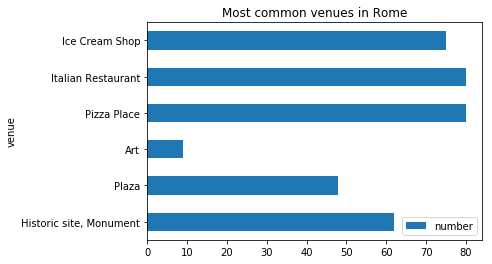

In [89]:
# The code was removed by Watson Studio for sharing.

Let's analyze each Borough. See how many venues were returned for each of them, group them & take the mean of the frequency of occurrence of each category, and display the top 10 venues for each borough.

In [11]:
Rome_venues.groupby('Borough').count()

,City,BoroughLatitude,BoroughLongitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
Borough,,,,,,,
Appia antica,100,100,100,100,100,100,100
Appio Latino,100,100,100,100,100,100,100
Business District,100,100,100,100,100,100,100
Historical centre,100,100,100,100,100,100,100
Monte Sacro,100,100,100,100,100,100,100
Parioli Nomentano,100,100,100,100,100,100,100
Prenestino Centocelle,100,100,100,100,100,100,100
Roma delle torri,100,100,100,100,100,100,100
Tiburtana,100,100,100,100,100,100,100


In [12]:
# one hot encoding
rome_onehot = pd.get_dummies(Rome_venues[['VenueCategory']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
rome_onehot['Borough'] = Rome_venues['Borough'] 

# move neighborhood column to the first column
fixed_columns = [rome_onehot.columns[-1]] + list(rome_onehot.columns[:-1])
rome_onehot = rome_onehot[fixed_columns]

rome_onehot.head()
rome_onehot.shape

(900, 103)

In [13]:
rome_grouped = rome_onehot.groupby('Borough').mean().reset_index()

In [14]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Borough']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

In [15]:
# create a new dataframe
rome_venues_sorted = pd.DataFrame(columns=columns)
rome_venues_sorted['Borough'] = rome_grouped['Borough']

for ind in np.arange(rome_grouped.shape[0]):
    rome_venues_sorted.iloc[ind, 1:] = return_most_common_venues(rome_grouped.iloc[ind, :], num_top_venues)

rome_venues_sorted.head(10)

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Appia antica,Pizza Place,Italian Restaurant,Ice Cream Shop,Historic Site,Park,Plaza,Hotel,Café,Gastropub,Greek Restaurant
1,Appio Latino,Italian Restaurant,Pizza Place,Ice Cream Shop,Historic Site,Park,Gym / Fitness Center,Café,Plaza,Market,Hotel
2,Business District,Italian Restaurant,Hotel,Supermarket,Café,Fast Food Restaurant,Pizza Place,Chinese Restaurant,Restaurant,Ice Cream Shop,Pub
3,Historical centre,Plaza,Historic Site,Ice Cream Shop,Italian Restaurant,Monument / Landmark,Church,Fountain,Sandwich Place,Hotel,Wine Bar
4,Monte Sacro,Italian Restaurant,Pizza Place,Park,Cocktail Bar,Ice Cream Shop,Dessert Shop,Restaurant,Steakhouse,Café,Sandwich Place
5,Parioli Nomentano,Plaza,Ice Cream Shop,Historic Site,Hotel,Monument / Landmark,Fountain,Sandwich Place,Art Museum,Italian Restaurant,Park
6,Prenestino Centocelle,Ice Cream Shop,Pizza Place,Italian Restaurant,Hotel,Cocktail Bar,Park,Dessert Shop,Café,Plaza,Steakhouse
7,Roma delle torri,Pizza Place,Italian Restaurant,Ice Cream Shop,Park,Gym / Fitness Center,Historic Site,Hotel,Dessert Shop,Café,Sandwich Place
8,Tiburtana,Ice Cream Shop,Pizza Place,Italian Restaurant,Hotel,Cocktail Bar,Dessert Shop,Steakhouse,Café,Chinese Restaurant,Park


Cluster Neighborhoods - Run k-means to cluster the boroughs into 4 clusters.

In [76]:
# set number of clusters
kclusters = 5

rome_grouped_clustering = rome_grouped.drop('Borough', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(rome_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 1, 2, 0, 3, 0, 4, 1, 4], dtype=int32)

In [20]:
# add clustering labels
rome_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [21]:
rome_mergedd = rome_df

# add latitude/longitude for each neighborhood
rome_mergedd = rome_mergedd.join(rome_venues_sorted.set_index('Borough'), on='Borough')

rome_mergedd.head(10) # check the last columns

,City,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Rome,Historical centre,41.89,12.49,0,Plaza,Historic Site,Ice Cream Shop,Sandwich Place,Fountain,Italian Restaurant,Monument / Landmark,Church,Hotel,Wine Bar
1,Rome,Parioli Nomentano,41.92,12.50,0,Plaza,Ice Cream Shop,Historic Site,Hotel,Monument / Landmark,Fountain,Sandwich Place,Art Museum,Italian Restaurant,Park
2,Rome,Monte Sacro,41.96,12.52,3,Italian Restaurant,Pizza Place,Park,Cocktail Bar,Ice Cream Shop,Dessert Shop,Café,Restaurant,Steakhouse,Electronics Store
3,Rome,Tiburtana,41.92,12.56,4,Ice Cream Shop,Pizza Place,Italian Restaurant,Hotel,Steakhouse,Dessert Shop,Cocktail Bar,Park,Chinese Restaurant,Gastropub
4,Rome,Prenestino Centocelle,41.90,12.56,4,Ice Cream Shop,Pizza Place,Hotel,Italian Restaurant,Park,Café,Cocktail Bar,Dessert Shop,Plaza,Steakhouse
5,Rome,Roma delle torri,41.88,12.57,1,Pizza Place,Italian Restaurant,Ice Cream Shop,Park,Gym / Fitness Center,Historic Site,Dessert Shop,Café,Sandwich Place,Gastropub
6,Rome,Appio Latino,41.86,12.55,1,Italian Restaurant,Pizza Place,Ice Cream Shop,Historic Site,Park,Gym / Fitness Center,Café,Hotel,Market,Plaza
7,Rome,Appia antica,41.84,12.52,1,Pizza Place,Ice Cream Shop,Italian Restaurant,Historic Site,Park,Plaza,Hotel,Café,Gastropub,Tennis Court
8,Rome,Business District,41.96,12.42,2,Italian Restaurant,Supermarket,Hotel,Pizza Place,Café,Restaurant,Fast Food Restaurant,Pub,Chinese Restaurant,Ice Cream Shop


In [ ]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium
print('Libraries installed!')

Solving environment: | 

In [ ]:
# create map
Rome_map_clusters = folium.Map(location=[Rome_latitude, Rome_longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(rome_mergedd['Latitude'], rome_mergedd['Longitude'], rome_mergedd['Borough'], rome_mergedd['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(Rome_map_clusters)
       
Rome_map_clusters

## PARIS

In [21]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

#Use geopy library to get the latitude and longitude values of Rome
Paris_address = 'Paris, France'
Paris_geolocator = Nominatim(user_agent="paris_explorer")
Paris_location = Paris_geolocator.geocode(Paris_address)
Paris_latitude = Paris_location.latitude
Paris_longitude = Paris_location.longitude
print('The geographical coordinate of Paris are {}, {}.'.format(Paris_latitude, Paris_longitude))

The geographical coordinate of Paris are 48.8566969, 2.3514616.


In [22]:
paris_venues = []

for city, borough, lat, long in zip(paris_df['City'], paris_df['Borough'], paris_df['Latitude'], paris_df['Longitude']):
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        radius, 
        LIMIT)
    
    paris_results = requests.get(url).json()['response']['groups'][0]['items']
    
    for venue in paris_results:
        paris_venues.append((
            city, 
            borough,
            lat, 
            long, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))

In [23]:
paris_venues = pd.DataFrame(paris_venues)
paris_venues.columns = ['City', 'Borough', 'BoroughLatitude', 'BoroughLongitude', 'VenueName', 'VenueLatitude', 'VenueLongitude', 'VenueCategory']
print(paris_venues.shape)
paris_venues.head()

(2015, 8)


,City,Borough,BoroughLatitude,BoroughLongitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,Paris,Louvre,48.8592,2.3417,Place du Louvre,48.859841,2.340822,Plaza
1,Paris,Louvre,48.8592,2.3417,Cour Carrée du Louvre,48.860360,2.338543,Pedestrian Plaza
2,Paris,Louvre,48.8592,2.3417,La Vénus de Milo (Vénus de Milo),48.859943,2.337234,Exhibit
3,Paris,Louvre,48.8592,2.3417,Musée du Louvre,48.860847,2.336440,Art Museum
4,Paris,Louvre,48.8592,2.3417,Chez Nous,48.855823,2.340271,Wine Bar


In [28]:
# The code was removed by Watson Studio for sharing.

In [31]:

# instantiate a word cloud object
Paris_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
Paris_wc.generate(ParisText)

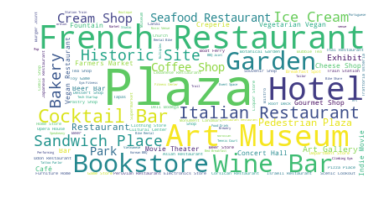

In [32]:
# display the word cloud
plt.imshow(Paris_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [57]:
paris_venues.groupby('VenueCategory').count() 

,City,Borough,BoroughLatitude,BoroughLongitude,VenueName,VenueLatitude,VenueLongitude
VenueCategory,,,,,,,
Art Gallery,29,29,29,29,29,29,29
Art Museum,110,110,110,110,110,110,110
Asian Restaurant,13,13,13,13,13,13,13
BBQ Joint,5,5,5,5,5,5,5
Bakery,43,43,43,43,43,43,43
Bar,24,24,24,24,24,24,24
Bed & Breakfast,3,3,3,3,3,3,3
Beer Bar,18,18,18,18,18,18,18
Beer Garden,5,5,5,5,5,5,5


In [61]:
sub_df = paris_venues[paris_venues['VenueCategory'] == 'Ice Cream Shop']
len(sub_df)

43

In [62]:
sub_df1 = paris_venues[paris_venues['VenueCategory'] == 'Pizza Place']
len(sub_df1)

12

In [63]:
sub_df2 = paris_venues[paris_venues['VenueCategory'] == 'Garden']
len(sub_df2)

63

In [64]:
sub_df3 = paris_venues[paris_venues['VenueCategory'] == 'Park']
len(sub_df3)

39

In [65]:
sub_df = paris_venues[paris_venues['VenueCategory'] == 'Trail']
len(sub_df)

4

In [66]:
sub_df4 = paris_venues[paris_venues['VenueCategory'] == 'Monument / Landmark']
len(sub_df4)

14

In [67]:
sub_df4 = paris_venues[paris_venues['VenueCategory'] == 'Church']
len(sub_df4)

13

In [68]:
sub_df4 = paris_venues[paris_venues['VenueCategory'] == 'Plaza']
len(sub_df4)

153

In [70]:
sub_df4 = paris_venues[paris_venues['VenueCategory'] == 'Fountain']
len(sub_df4)

24

In [71]:
sub_df4 = paris_venues[paris_venues['VenueCategory'] == 'Historic Site']
len(sub_df4)

43

In [72]:
sub_df4 = paris_venues[paris_venues['VenueCategory'] == 'Italian Restaurant']
len(sub_df4)

53

In [73]:
sub_df4 = paris_venues[paris_venues['VenueCategory'] == 'French Restaurant']
len(sub_df4)

123

In [74]:
sub_df4 = paris_venues[paris_venues['VenueCategory'] == 'Theater']
len(sub_df4)

2

Text(0.5, 1.0, 'Most common venues in Paris')

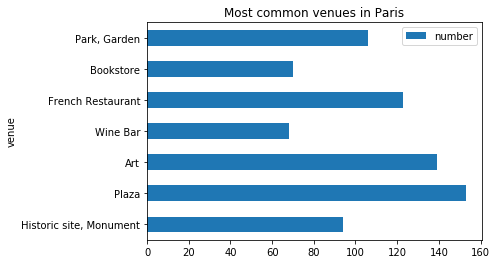

In [88]:
# The code was removed by Watson Studio for sharing.

In [94]:
# one hot encoding
paris_onehot = pd.get_dummies(paris_venues[['VenueCategory']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
paris_onehot['Borough'] = paris_venues['Borough'] 

# move neighborhood column to the first column
fixed_columns = [paris_onehot.columns[-1]] + list(paris_onehot.columns[:-1])
paris_onehot = paris_onehot[fixed_columns]

paris_onehot.head()
paris_onehot.shape

(2015, 109)

In [95]:
paris_grouped = paris_onehot.groupby('Borough').mean().reset_index()

In [96]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Borough']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

In [97]:
# create a new dataframe
paris_venues_sorted = pd.DataFrame(columns=columns)
paris_venues_sorted['Borough'] = paris_grouped['Borough']

for ind in np.arange(paris_grouped.shape[0]):
    paris_venues_sorted.iloc[ind, 1:] = return_most_common_venues(paris_grouped.iloc[ind, :], num_top_venues)

paris_venues_sorted.head(22)

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Batignolles,Hotel,Art Museum,Plaza,French Restaurant,Historic Site,Garden,Wine Bar,Italian Restaurant,Pedestrian Plaza,Bookstore
1,Bois de Boulogne,Train Station,Supermarket,Furniture / Home Store,Campground,Park,Wine Bar,Clothing Store,Cocktail Bar,Coffee Shop,Comic Shop
2,Bois de Vincennes,Train Station,Supermarket,Park,Wine Bar,Deli / Bodega,Clothing Store,Cocktail Bar,Coffee Shop,Comic Shop,Concert Hall
3,Bourse,Plaza,Cocktail Bar,Hotel,Wine Bar,Art Museum,Bookstore,French Restaurant,Seafood Restaurant,Coffee Shop,Sandwich Place
4,Buttes Chaumont,French Restaurant,Wine Bar,Italian Restaurant,Coffee Shop,Hotel,Sandwich Place,Cocktail Bar,Bakery,Art Museum,Bookstore
5,Elysees,Plaza,Hotel,Art Museum,Garden,French Restaurant,Historic Site,Wine Bar,Pedestrian Plaza,Italian Restaurant,Indie Movie Theater
6,Entrepot,Plaza,Cocktail Bar,Bookstore,Hotel,Wine Bar,Art Museum,French Restaurant,Sandwich Place,Coffee Shop,Bakery
7,Gobelins,French Restaurant,Plaza,Cocktail Bar,Wine Bar,Seafood Restaurant,Park,Italian Restaurant,Sandwich Place,Bar,Art Museum
8,Hotel de Ville,Plaza,Bookstore,Hotel,Wine Bar,French Restaurant,Art Museum,Bakery,Cocktail Bar,Seafood Restaurant,Garden
9,Louvre,Plaza,Hotel,Art Museum,Ice Cream Shop,Bookstore,Seafood Restaurant,French Restaurant,Garden,Sandwich Place,Wine Bar


In [98]:
# set number of clusters
kclustersParis = 5

paris_grouped_clustering = paris_grouped.drop('Borough', 1)

# run k-means clustering
kmeansParis = KMeans(n_clusters=kclustersParis, random_state=0).fit(paris_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeansParis.labels_[0:10]

array([0, 3, 1, 2, 4, 0, 2, 4, 2, 2], dtype=int32)

In [99]:
# add clustering labels
paris_venues_sorted.insert(0, 'Cluster Labels', kmeansParis.labels_)

In [100]:
paris_mergedd = paris_df

# add latitude/longitude for each neighborhood
paris_mergedd = paris_mergedd.join(paris_venues_sorted.set_index('Borough'), on='Borough')

paris_mergedd.head(23) # check the last columns

,City,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Paris,Louvre,48.8592,2.3417,2,Plaza,Hotel,Art Museum,Ice Cream Shop,Bookstore,Seafood Restaurant,French Restaurant,Garden,Sandwich Place,Wine Bar
1,Paris,Bourse,48.8655,2.3426,2,Plaza,Cocktail Bar,Hotel,Wine Bar,Art Museum,Bookstore,French Restaurant,Seafood Restaurant,Coffee Shop,Sandwich Place
2,Paris,Temple,48.8637,2.3415,2,Plaza,Cocktail Bar,Hotel,Art Museum,Bookstore,Wine Bar,French Restaurant,Seafood Restaurant,Garden,Sandwich Place
3,Paris,Hotel de Ville,48.8601,2.3507,2,Plaza,Bookstore,Hotel,Wine Bar,French Restaurant,Art Museum,Bakery,Cocktail Bar,Seafood Restaurant,Garden
4,Paris,Pantheon,48.8448,2.3471,2,Plaza,French Restaurant,Wine Bar,Art Museum,Bookstore,Seafood Restaurant,Cocktail Bar,Garden,Italian Restaurant,Park
5,Paris,Luxembourg,48.8493,2.3300,0,Plaza,French Restaurant,Art Museum,Garden,Hotel,Ice Cream Shop,Historic Site,Bookstore,Pedestrian Plaza,Art Gallery
6,Paris,Palais Bourbon,48.8565,2.3210,0,Plaza,Hotel,Art Museum,French Restaurant,Garden,Historic Site,Ice Cream Shop,Bookstore,Pedestrian Plaza,Art Gallery
7,Paris,Elysees,48.8763,2.3183,0,Plaza,Hotel,Art Museum,Garden,French Restaurant,Historic Site,Wine Bar,Pedestrian Plaza,Italian Restaurant,Indie Movie Theater
8,Paris,Opera,48.8718,2.3399,2,Plaza,Hotel,Art Museum,Bookstore,Cocktail Bar,Wine Bar,Coffee Shop,Italian Restaurant,Historic Site,Sandwich Place
9,Paris,Entrepot,48.8709,2.3561,2,Plaza,Cocktail Bar,Bookstore,Hotel,Wine Bar,Art Museum,French Restaurant,Sandwich Place,Coffee Shop,Bakery


In [ ]:
# create map
paris_map_clusters = folium.Map(location=[Paris_latitude, Paris_longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(paris_mergedd['Latitude'], paris_mergedd['Longitude'], paris_mergedd['Borough'], paris_mergedd['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(paris_map_clusters)
       
paris_map_clusters

## LONDON

In [33]:
#Use geopy library to get the latitude and longitude values of Rome
London_address = 'London, United Kingdom'
London_geolocator = Nominatim(user_agent="london_explorer")
London_location = London_geolocator.geocode(London_address)
London_latitude = London_location.latitude
London_longitude = London_location.longitude
print('The geographical coordinate of London are {}, {}.'.format(London_latitude, London_longitude))

The geographical coordinate of London are 51.5073219, -0.1276474.


In [34]:
london_venues = []

for city, borough, lat, long in zip(London_df['City'], London_df['Borough'], London_df['Latitude'], London_df['Longitude']):
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        radius, 
        LIMIT)
    
    london_results = requests.get(url).json()['response']['groups'][0]['items']
    
    for venue in london_results:
        london_venues.append((
            city, 
            borough,
            lat, 
            long, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))

In [35]:
london_venues = pd.DataFrame(london_venues)
london_venues.columns = ['City', 'Borough', 'BoroughLatitude', 'BoroughLongitude', 'VenueName', 'VenueLatitude', 'VenueLongitude', 'VenueCategory']
print(london_venues.shape)
london_venues.head()

(1400, 8)


,City,Borough,BoroughLatitude,BoroughLongitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,London,London City,51.5155,-0.0922,The Ned Hotel,51.513755,-0.090067,Hotel
1,London,London City,51.5155,-0.0922,The Merchant House,51.513264,-0.093039,Cocktail Bar
2,London,London City,51.5155,-0.0922,Rosslyn,51.512574,-0.093381,Coffee Shop
3,London,London City,51.5155,-0.0922,Barbican Centre,51.519855,-0.093942,Performing Arts Venue
4,London,London City,51.5155,-0.0922,Barbican Art Gallery,51.519800,-0.093969,Art Gallery


In [36]:
# The code was removed by Watson Studio for sharing.

In [43]:
# instantiate a word cloud object
London_wc = WordCloud(
    background_color='black',
    max_words=1800,
    stopwords=stopwords
)

# generate the word cloud
London_wc.generate(LondonText)

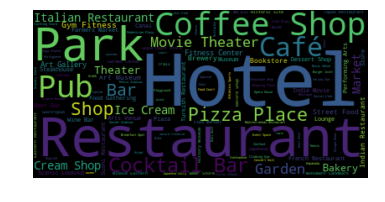

In [44]:
# display the word cloud
plt.imshow(London_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [72]:
london_venues.groupby('VenueCategory').count()

,City,Borough,BoroughLatitude,BoroughLongitude,VenueName,VenueLatitude,VenueLongitude
VenueCategory,,,,,,,
Argentinian Restaurant,2,2,2,2,2,2,2
Art Gallery,22,22,22,22,22,22,22
Art Museum,16,16,16,16,16,16,16
Arts & Crafts Store,2,2,2,2,2,2,2
Asian Restaurant,3,3,3,3,3,3,3
Athletics & Sports,4,4,4,4,4,4,4
Australian Restaurant,2,2,2,2,2,2,2
BBQ Joint,6,6,6,6,6,6,6
Bakery,23,23,23,23,23,23,23


In [73]:
sub_df4 = london_venues[london_venues['VenueCategory'] == 'Pub']
len(sub_df4)

66

In [74]:
sub_df4 = london_venues[london_venues['VenueCategory'] == 'French Restaurant']
len(sub_df4)

14

In [75]:
sub_df4 = london_venues[london_venues['VenueCategory'] == 'Italian Restaurant']
len(sub_df4)

30

In [76]:
sub_df4 = london_venues[london_venues['VenueCategory'] == 'Fountain']
len(sub_df4)

3

In [77]:
sub_df4 = london_venues[london_venues['VenueCategory'] == 'Historic Site']
len(sub_df4)

10

In [78]:
sub_df4 = london_venues[london_venues['VenueCategory'] == 'Church']
len(sub_df4)

0

In [79]:
sub_df4 = london_venues[london_venues['VenueCategory'] == 'Monument / Landmark']
len(sub_df4)

8

In [80]:
sub_df = london_venues[london_venues['VenueCategory'] == 'Trail']
len(sub_df)

9

In [81]:
sub_df3 = london_venues[london_venues['VenueCategory'] == 'Park']
len(sub_df3)

77

In [82]:
sub_df2 = london_venues[london_venues['VenueCategory'] == 'Garden']
len(sub_df2)

28

In [83]:
sub_df1 = london_venues[london_venues['VenueCategory'] == 'Pizza Place']
len(sub_df1)


39

In [84]:
sub_df = london_venues[london_venues['VenueCategory'] == 'Ice Cream Shop']
len(sub_df)

30

In [85]:
sub_df = london_venues[london_venues['VenueCategory'] == 'Historic Site']
len(sub_df)

10

In [86]:
sub_df = london_venues[london_venues['VenueCategory'] == 'Plaza']
len(sub_df)

13

Text(0.5, 1.0, 'Most common venues in London')

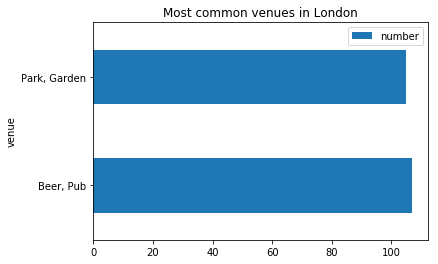

In [87]:
# The code was removed by Watson Studio for sharing.

In [103]:
# one hot encoding
london_onehot = pd.get_dummies(london_venues[['VenueCategory']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
london_onehot['Borough'] = london_venues['Borough'] 

# move neighborhood column to the first column
fixed_columns = [london_onehot.columns[-1]] + list(london_onehot.columns[:-1])
london_onehot = london_onehot[fixed_columns]

london_onehot.head()

,Borough,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Bakery,...,Toy / Game Store,Trail,Turkish Restaurant,Vietnamese Restaurant,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,London City,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,London City,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,London City,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,London City,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,London City,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [104]:
london_grouped = london_onehot.groupby('Borough').mean().reset_index()

In [105]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Borough']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

In [106]:
# create a new dataframe
london_venues_sorted = pd.DataFrame(columns=columns)
london_venues_sorted['Borough'] = london_grouped['Borough']

for ind in np.arange(london_grouped.shape[0]):
    london_venues_sorted.iloc[ind, 1:] = return_most_common_venues(london_grouped.iloc[ind, :], num_top_venues)

london_venues_sorted.head(16)

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Camden,Hotel,Cocktail Bar,Theater,Lounge,Indian Restaurant,Department Store,Garden,Bookstore,Ice Cream Shop,Market
1,Greenwich,Hotel,Coffee Shop,Italian Restaurant,Cocktail Bar,Scenic Lookout,Market,Theater,Pizza Place,Street Food Gathering,Bar
2,Hackney,Cocktail Bar,Pub,Bakery,Pizza Place,Park,Coffee Shop,Ice Cream Shop,Italian Restaurant,Beer Bar,Market
3,Hammersmith and Fulham,Café,Park,Pizza Place,Restaurant,Pub,Coffee Shop,Gym / Fitness Center,Gastropub,Bar,Italian Restaurant
4,Haringey,Pub,Café,Turkish Restaurant,Park,Coffee Shop,Trail,Bakery,Pizza Place,Brewery,Climbing Gym
5,Islington,Hotel,Cocktail Bar,Coffee Shop,Pub,Market,Park,Bakery,Ice Cream Shop,Bookstore,Theater
6,Kensington and Chelsea,Hotel,Park,Ice Cream Shop,Art Gallery,Café,Japanese Restaurant,Hotel Bar,Gym / Fitness Center,Pizza Place,Garden
7,Lambeth,Park,Coffee Shop,Art Gallery,Pizza Place,Café,Hotel,Ice Cream Shop,Italian Restaurant,Brewery,Pub
8,Levisham,Park,Pub,Coffee Shop,Italian Restaurant,Café,Indian Restaurant,Bar,Historic Site,Pizza Place,Museum
9,London City,Hotel,Coffee Shop,Cocktail Bar,Theater,Garden,Bookstore,Scenic Lookout,Street Food Gathering,Italian Restaurant,Performing Arts Venue


In [107]:
# set number of clusters
kclusters = 5

london_grouped_clustering = london_grouped.drop('Borough', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(london_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 3, 1, 2, 4, 3, 0, 2, 4, 3], dtype=int32)

In [108]:
# add clustering labels
london_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [109]:
london_mergedd = London_df

# add latitude/longitude for each neighborhood
london_mergedd = london_mergedd.join(london_venues_sorted.set_index('Borough'), on='Borough')

london_mergedd.head(23) # check the last columns

,City,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,London,London City,51.5155,-0.0922,3,Hotel,Coffee Shop,Cocktail Bar,Theater,Garden,Bookstore,Scenic Lookout,Street Food Gathering,Italian Restaurant,Performing Arts Venue
1,London,Camden,51.5290,-0.1255,0,Hotel,Cocktail Bar,Theater,Lounge,Indian Restaurant,Department Store,Garden,Bookstore,Ice Cream Shop,Market
2,London,Greenwich,51.4892,-0.0648,3,Hotel,Coffee Shop,Italian Restaurant,Cocktail Bar,Scenic Lookout,Market,Theater,Pizza Place,Street Food Gathering,Bar
3,London,Hackney,51.5450,-0.0553,1,Cocktail Bar,Pub,Bakery,Pizza Place,Park,Coffee Shop,Ice Cream Shop,Italian Restaurant,Beer Bar,Market
4,London,Hammersmith and Fulham,51.4927,-0.2339,2,Café,Park,Pizza Place,Restaurant,Pub,Coffee Shop,Gym / Fitness Center,Gastropub,Bar,Italian Restaurant
5,London,Haringey,51.6000,-0.1119,4,Pub,Café,Turkish Restaurant,Park,Coffee Shop,Trail,Bakery,Pizza Place,Brewery,Climbing Gym
6,London,Islington,51.5416,-0.1022,3,Hotel,Cocktail Bar,Coffee Shop,Pub,Market,Park,Bakery,Ice Cream Shop,Bookstore,Theater
7,London,Kensington and Chelsea,51.5020,-0.1947,0,Hotel,Park,Ice Cream Shop,Art Gallery,Café,Japanese Restaurant,Hotel Bar,Gym / Fitness Center,Pizza Place,Garden
8,London,Lambeth,51.4607,-0.1163,2,Park,Coffee Shop,Art Gallery,Pizza Place,Café,Hotel,Ice Cream Shop,Italian Restaurant,Brewery,Pub
9,London,Levisham,51.4452,-0.0209,4,Park,Pub,Coffee Shop,Italian Restaurant,Café,Indian Restaurant,Bar,Historic Site,Pizza Place,Museum


In [ ]:
# create map
london_map_clusters = folium.Map(location=[London_latitude, London_longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(london_mergedd['Latitude'], london_mergedd['Longitude'], london_mergedd['Borough'], london_mergedd['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(london_map_clusters)
       
london_map_clusters

## BARCELONA

In [47]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

#Use geopy library to get the latitude and longitude values of Rome
Barcelona_address = 'Barcelona, Spain'
Barcelona_geolocator = Nominatim(user_agent="barcelona_explorer")
Barcelona_location = Barcelona_geolocator.geocode(Barcelona_address)
Barcelona_latitude = Barcelona_location.latitude
Barcelona_longitude = Barcelona_location.longitude
print('The geographical coordinate of Barcelona are {}, {}.'.format(Barcelona_latitude, Barcelona_longitude))

The geographical coordinate of Barcelona are 41.3828939, 2.1774322.


In [48]:
barcelona_venues = []

for city, borough, lat, long in zip(Barcelona_df['City'], Barcelona_df['Borough'], Barcelona_df['Latitude'], Barcelona_df['Longitude']):
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        radius, 
        LIMIT)
    
    barcelona_results = requests.get(url).json()['response']['groups'][0]['items']
    
    for venue in barcelona_results:
        barcelona_venues.append((
            city, 
            borough,
            lat, 
            long, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))

In [49]:
barcelona_venues = pd.DataFrame(barcelona_venues)
barcelona_venues.columns = ['City', 'Borough', 'BoroughLatitude', 'BoroughLongitude', 'VenueName', 'VenueLatitude', 'VenueLongitude', 'VenueCategory']
print(barcelona_venues.shape)
barcelona_venues.head()

(1000, 8)


,City,Borough,BoroughLatitude,BoroughLongitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,Barcelona,Ciutat Vella,41.3827,2.183185,Pastisseria Hofmann,41.385063,2.182797,Dessert Shop
1,Barcelona,Ciutat Vella,41.3827,2.183185,Dr. Stravinsky,41.384185,2.180651,Cocktail Bar
2,Barcelona,Ciutat Vella,41.3827,2.183185,Barrio Gótico,41.383660,2.177290,Neighborhood
3,Barcelona,Ciutat Vella,41.3827,2.183185,Soho House Barcelona,41.378466,2.179365,Hotel
4,Barcelona,Ciutat Vella,41.3827,2.183185,El Xampanyet,41.384558,2.181764,Tapas Restaurant


In [50]:
# The code was removed by Watson Studio for sharing.

In [53]:
# instantiate a word cloud object
Barcelona_wc = WordCloud(
    background_color='black',
    max_words=2200,
    stopwords=stopwords
)

# generate the word cloud
Barcelona_wc.generate(BarcelonaText)

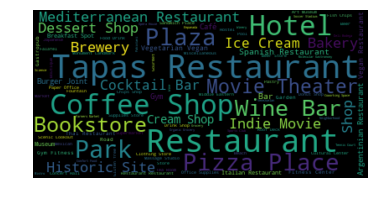

In [54]:
# display the word cloud
plt.imshow(Barcelona_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [56]:
barcelona_venues.groupby('VenueCategory').count()

,City,Borough,BoroughLatitude,BoroughLongitude,VenueName,VenueLatitude,VenueLongitude
VenueCategory,,,,,,,
Arcade,2,2,2,2,2,2,2
Argentinian Restaurant,16,16,16,16,16,16,16
Art Museum,8,8,8,8,8,8,8
Asian Restaurant,1,1,1,1,1,1,1
Bakery,23,23,23,23,23,23,23
Bar,12,12,12,12,12,12,12
Beach,7,7,7,7,7,7,7
Beer Bar,6,6,6,6,6,6,6
Beer Garden,3,3,3,3,3,3,3


In [57]:
sub_df4 = barcelona_venues[barcelona_venues['VenueCategory'] == 'French Restaurant']
len(sub_df4)

0

In [58]:
sub_df4 = barcelona_venues[barcelona_venues['VenueCategory'] == 'Italian Restaurant']
len(sub_df4)

13

In [59]:
sub_df4 = barcelona_venues[barcelona_venues['VenueCategory'] == 'Fountain']
len(sub_df4)

5

In [60]:
sub_df4 = barcelona_venues[barcelona_venues['VenueCategory'] == 'Historic Site']
len(sub_df4)

22

In [61]:
sub_df = barcelona_venues[barcelona_venues['VenueCategory'] == 'Ice Cream Shop']
len(sub_df)

19

In [62]:
sub_df4 = barcelona_venues[barcelona_venues['VenueCategory'] == 'Plaza']
len(sub_df4)

31

In [63]:
sub_df4 = barcelona_venues[barcelona_venues['VenueCategory'] == 'Monument / Landmark']
len(sub_df4)

10

In [64]:
sub_df = barcelona_venues[barcelona_venues['VenueCategory'] == 'Trail']
len(sub_df)

2

In [65]:
sub_df3 = barcelona_venues[barcelona_venues['VenueCategory'] == 'Park']
len(sub_df3)

32

In [66]:
sub_df2 = barcelona_venues[barcelona_venues['VenueCategory'] == 'Garden']
len(sub_df2)

7

In [67]:
sub_df1 = barcelona_venues[barcelona_venues['VenueCategory'] == 'Pizza Place']
len(sub_df1)

31

In [68]:
sub_df1 = barcelona_venues[barcelona_venues['VenueCategory'] == 'Theater']
len(sub_df1)

0

Text(0.5, 1.0, 'Most common venues in Barcelona')

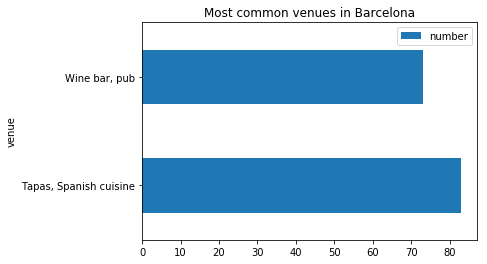

In [71]:
# The code was removed by Watson Studio for sharing.

In [111]:
# one hot encoding
barcelona_onehot = pd.get_dummies(barcelona_venues[['VenueCategory']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
barcelona_onehot['Borough'] = barcelona_venues['Borough'] 

# move neighborhood column to the first column
fixed_columns = [barcelona_onehot.columns[-1]] + list(barcelona_onehot.columns[:-1])
barcelona_onehot = barcelona_onehot[fixed_columns]

barcelona_onehot.head()
barcelona_onehot.shape

(1000, 120)

In [112]:
barcelona_grouped = barcelona_onehot.groupby('Borough').mean().reset_index()

In [113]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Borough']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

In [114]:
# create a new dataframe
barcelona_venues_sorted = pd.DataFrame(columns=columns)
barcelona_venues_sorted['Borough'] = barcelona_grouped['Borough']

for ind in np.arange(barcelona_grouped.shape[0]):
    barcelona_venues_sorted.iloc[ind, 1:] = return_most_common_venues(barcelona_grouped.iloc[ind, :], num_top_venues)

barcelona_venues_sorted.head(10)

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ciutat Vella,Tapas Restaurant,Hotel,Coffee Shop,Plaza,Pizza Place,Bookstore,Cocktail Bar,Burger Joint,Argentinian Restaurant,Bakery
1,Eixample,Pizza Place,Plaza,Tapas Restaurant,Hotel,Coffee Shop,Bookstore,Wine Bar,Dessert Shop,Cocktail Bar,Italian Restaurant
2,Gracia,Tapas Restaurant,Hotel,Bookstore,Coffee Shop,Wine Bar,Park,Historic Site,Indie Movie Theater,Plaza,Mediterranean Restaurant
3,Horta Guinardo,Hotel,Tapas Restaurant,Coffee Shop,Historic Site,Burger Joint,Wine Bar,Bakery,Park,Bookstore,Indie Movie Theater
4,Les Corts,Wine Bar,Park,Coffee Shop,Pizza Place,Mediterranean Restaurant,Tapas Restaurant,Gym / Fitness Center,Dessert Shop,Fish & Chips Shop,Museum
5,Nou Barris,Tapas Restaurant,Spanish Restaurant,Historic Site,Restaurant,Mediterranean Restaurant,Indie Movie Theater,Park,Bakery,Plaza,Brewery
6,Sant Andreu,Tapas Restaurant,Park,Mediterranean Restaurant,Brewery,Historic Site,Bakery,Restaurant,Spanish Restaurant,Coffee Shop,Italian Restaurant
7,Sant Marti,Hotel,Tapas Restaurant,Coffee Shop,Historic Site,Park,Burger Joint,Bakery,Plaza,Beach,Bookstore
8,Sants Montjuic,Pizza Place,Coffee Shop,Plaza,Cocktail Bar,Tapas Restaurant,Dessert Shop,Wine Bar,Argentinian Restaurant,Bookstore,Italian Restaurant
9,Sarria Sant Gervasi,Wine Bar,Tapas Restaurant,Park,Ice Cream Shop,Coffee Shop,Brewery,Pizza Place,Dessert Shop,Japanese Restaurant,Gastropub


In [115]:
# set number of clusters
kclusters = 5

barcelona_grouped_clustering = barcelona_grouped.drop('Borough', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(barcelona_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 4, 2, 2, 0, 3, 3, 2, 4, 0], dtype=int32)

In [116]:
# add clustering labels
barcelona_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [117]:
barcelona_mergedd = Barcelona_df

# add latitude/longitude for each neighborhood
barcelona_mergedd = barcelona_mergedd.join(barcelona_venues_sorted.set_index('Borough'), on='Borough')

barcelona_mergedd.head(23) # check the last columns

,City,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barcelona,Ciutat Vella,41.382700,2.183185,1,Tapas Restaurant,Hotel,Coffee Shop,Plaza,Pizza Place,Bookstore,Cocktail Bar,Burger Joint,Argentinian Restaurant,Bakery
1,Barcelona,Eixample,41.383700,2.152700,4,Pizza Place,Plaza,Tapas Restaurant,Hotel,Coffee Shop,Bookstore,Wine Bar,Dessert Shop,Cocktail Bar,Italian Restaurant
2,Barcelona,Sants Montjuic,41.353600,2.143800,4,Pizza Place,Coffee Shop,Plaza,Cocktail Bar,Tapas Restaurant,Dessert Shop,Wine Bar,Argentinian Restaurant,Bookstore,Italian Restaurant
3,Barcelona,Les Corts,41.389000,2.133000,0,Wine Bar,Park,Coffee Shop,Pizza Place,Mediterranean Restaurant,Tapas Restaurant,Gym / Fitness Center,Dessert Shop,Fish & Chips Shop,Museum
4,Barcelona,Sarria Sant Gervasi,41.402700,2.116700,0,Wine Bar,Tapas Restaurant,Park,Ice Cream Shop,Coffee Shop,Brewery,Pizza Place,Dessert Shop,Japanese Restaurant,Gastropub
5,Barcelona,Gracia,41.401100,2.157800,2,Tapas Restaurant,Hotel,Bookstore,Coffee Shop,Wine Bar,Park,Historic Site,Indie Movie Theater,Plaza,Mediterranean Restaurant
6,Barcelona,Horta Guinardo,41.421600,2.164055,2,Hotel,Tapas Restaurant,Coffee Shop,Historic Site,Burger Joint,Wine Bar,Bakery,Park,Bookstore,Indie Movie Theater
7,Barcelona,Nou Barris,41.444743,2.178422,3,Tapas Restaurant,Spanish Restaurant,Historic Site,Restaurant,Mediterranean Restaurant,Indie Movie Theater,Park,Bakery,Plaza,Brewery
8,Barcelona,Sant Andreu,41.435700,2.194700,3,Tapas Restaurant,Park,Mediterranean Restaurant,Brewery,Historic Site,Bakery,Restaurant,Spanish Restaurant,Coffee Shop,Italian Restaurant
9,Barcelona,Sant Marti,41.408387,2.200759,2,Hotel,Tapas Restaurant,Coffee Shop,Historic Site,Park,Burger Joint,Bakery,Plaza,Beach,Bookstore


In [ ]:
# create map
barcelona_map_clusters = folium.Map(location=[Barcelona_latitude, Barcelona_longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(barcelona_mergedd['Latitude'], barcelona_mergedd['Longitude'], barcelona_mergedd['Borough'], barcelona_mergedd['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(barcelona_map_clusters)
       
barcelona_map_clusters

# TRY TO CLUSTER A MERGED DATAFRAME

Assess what a merged database looks like

In [101]:
cities = [rome_mergedd, paris_mergedd, london_mergedd, barcelona_mergedd]

In [104]:
allcities = pd.concat(cities, ignore_index = True)
allcities.drop(['Latitude', 'Longitude'], axis=1, inplace=True)
allcities.head(5)

,City,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Rome,Historical centre,0,Plaza,Historic Site,Ice Cream Shop,Sandwich Place,Fountain,Italian Restaurant,Monument / Landmark,Church,Hotel,Wine Bar
1,Rome,Parioli Nomentano,0,Plaza,Ice Cream Shop,Historic Site,Hotel,Monument / Landmark,Fountain,Sandwich Place,Art Museum,Italian Restaurant,Park
2,Rome,Monte Sacro,3,Italian Restaurant,Pizza Place,Park,Cocktail Bar,Ice Cream Shop,Dessert Shop,Café,Restaurant,Steakhouse,Electronics Store
3,Rome,Tiburtana,4,Ice Cream Shop,Pizza Place,Italian Restaurant,Hotel,Steakhouse,Dessert Shop,Cocktail Bar,Park,Chinese Restaurant,Gastropub
4,Rome,Prenestino Centocelle,4,Ice Cream Shop,Pizza Place,Hotel,Italian Restaurant,Park,Café,Cocktail Bar,Dessert Shop,Plaza,Steakhouse


Build the right dataset, apply clustering with different number of clusters

In [118]:
alldf = [rome_df, paris_df, London_df, Barcelona_df]
all_df = pd.concat(alldf, ignore_index = True)
all_df.head(5)

,City,Borough,Latitude,Longitude
0,Rome,Historical centre,41.89,12.49
1,Rome,Parioli Nomentano,41.92,12.50
2,Rome,Monte Sacro,41.96,12.52
3,Rome,Tiburtana,41.92,12.56
4,Rome,Prenestino Centocelle,41.90,12.56


In [119]:
allvenues = [Rome_venues, paris_venues, london_venues, barcelona_venues]
all_venues = pd.concat(allvenues, ignore_index = True)
all_venues.head(5)

,City,Borough,BoroughLatitude,BoroughLongitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,Rome,Historical centre,41.89,12.49,Colosseo,41.890633,12.492378,Historic Site
1,Rome,Historical centre,41.89,12.49,Tempio del Divo Romolo,41.891863,12.487126,Temple
2,Rome,Historical centre,41.89,12.49,Farnese Gardens,41.889928,12.485716,Garden
3,Rome,Historical centre,41.89,12.49,Palatino,41.888234,12.487209,Historic Site
4,Rome,Historical centre,41.89,12.49,Arco di Tito,41.890649,12.488537,Monument / Landmark


In [120]:
# one hot encoding
all_onehot = pd.get_dummies(all_venues[['VenueCategory']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
all_onehot['Borough'] = all_venues['Borough'] 

# move neighborhood column to the first column
fixed_columns = [all_onehot.columns[-1]] + list(all_onehot.columns[:-1])
all_onehot = all_onehot[fixed_columns]

all_onehot.head()
all_onehot.shape


(5315, 248)

In [145]:
all_grouped = all_onehot.groupby('Borough').mean().reset_index()

In [146]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Borough']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

In [151]:
# create a new dataframe
all_venues_sorted = pd.DataFrame(columns=columns)
all_venues_sorted['Borough'] = all_grouped['Borough']

for ind in np.arange(all_grouped.shape[0]):
    all_venues_sorted.iloc[ind, 1:] = return_most_common_venues(all_grouped.iloc[ind, :], num_top_venues)

all_venues_sorted.head(10)

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Appia antica,Pizza Place,Italian Restaurant,Ice Cream Shop,Historic Site,Park,Café,Hotel,Gastropub,Plaza,Gym / Fitness Center
1,Appio Latino,Italian Restaurant,Pizza Place,Ice Cream Shop,Historic Site,Park,Café,Gym / Fitness Center,Hotel,Market,Plaza
2,Batignolles,Hotel,Art Museum,Plaza,French Restaurant,Historic Site,Garden,Italian Restaurant,Bookstore,Wine Bar,Pedestrian Plaza
3,Bois de Boulogne,Train Station,Campground,Supermarket,Furniture / Home Store,Park,Fast Food Restaurant,Exhibit,Falafel Restaurant,Farm,Farmers Market
4,Bois de Vincennes,Train Station,Supermarket,Park,Yoga Studio,Food Court,Food & Drink Shop,Flea Market,Fish Market,Fish & Chips Shop,Film Studio
5,Bourse,Plaza,Hotel,Cocktail Bar,Wine Bar,Art Museum,Bookstore,French Restaurant,Ice Cream Shop,Seafood Restaurant,Coffee Shop
6,Business District,Italian Restaurant,Hotel,Supermarket,Café,Pizza Place,Restaurant,Fast Food Restaurant,Chinese Restaurant,Pub,Ice Cream Shop
7,Buttes Chaumont,French Restaurant,Italian Restaurant,Wine Bar,Coffee Shop,Hotel,Bakery,Sandwich Place,Cocktail Bar,Pizza Place,Park
8,Camden,Hotel,Cocktail Bar,Lounge,Theater,Ice Cream Shop,Department Store,Garden,Bookstore,Indian Restaurant,Park
9,Ciutat Vella,Hotel,Tapas Restaurant,Coffee Shop,Bookstore,Pizza Place,Plaza,Cocktail Bar,Burger Joint,Spanish Restaurant,Ice Cream Shop


In [152]:
# set number of clusters
kclusters = 7

all_grouped_clustering = all_grouped.drop('Borough', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(all_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 2, 1, 3, 3, 1, 2, 0, 4, 5], dtype=int32)

In [153]:
# add clustering labels
all_venues_sorted4 = all_venues_sorted
all_venues_sorted4.insert(0, 'Cluster Labels', kmeans.labels_)

In [154]:
all_mergedd = all_df

all_mergedd = all_mergedd.join(all_venues_sorted.set_index('Borough'), on='Borough')
all_mergedd.drop(['Latitude','Longitude'],axis=1,inplace=True)
all_mergedd.sort_values(by=['Cluster Labels'])
all_mergedd.head(75) # check the last columns

,City,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Rome,Historical centre,1,Plaza,Historic Site,Ice Cream Shop,Italian Restaurant,Sandwich Place,Fountain,Monument / Landmark,Church,Hotel,Wine Bar
1,Rome,Parioli Nomentano,1,Plaza,Ice Cream Shop,Historic Site,Hotel,Monument / Landmark,Fountain,Sandwich Place,Italian Restaurant,Wine Bar,Art Museum
2,Rome,Monte Sacro,2,Italian Restaurant,Pizza Place,Park,Cocktail Bar,Ice Cream Shop,Dessert Shop,Restaurant,Steakhouse,Café,Coffee Shop
3,Rome,Tiburtana,2,Ice Cream Shop,Pizza Place,Italian Restaurant,Hotel,Cocktail Bar,Steakhouse,Dessert Shop,Café,Chinese Restaurant,Park
4,Rome,Prenestino Centocelle,2,Ice Cream Shop,Pizza Place,Italian Restaurant,Hotel,Café,Dessert Shop,Park,Cocktail Bar,Plaza,Market
5,Rome,Roma delle torri,2,Pizza Place,Italian Restaurant,Ice Cream Shop,Park,Historic Site,Dessert Shop,Gym / Fitness Center,Sandwich Place,Café,Supermarket
6,Rome,Appio Latino,2,Italian Restaurant,Pizza Place,Ice Cream Shop,Historic Site,Park,Café,Gym / Fitness Center,Hotel,Market,Plaza
7,Rome,Appia antica,2,Pizza Place,Italian Restaurant,Ice Cream Shop,Historic Site,Park,Café,Hotel,Gastropub,Plaza,Gym / Fitness Center
8,Rome,Business District,2,Italian Restaurant,Hotel,Supermarket,Café,Pizza Place,Restaurant,Fast Food Restaurant,Chinese Restaurant,Pub,Ice Cream Shop
9,Paris,Louvre,1,Plaza,Hotel,Art Museum,Ice Cream Shop,Bookstore,Sandwich Place,French Restaurant,Garden,Wine Bar,Seafood Restaurant


## Visualize a quick comparison between cities

In [ ]:
# The code was removed by Watson Studio for sharing.

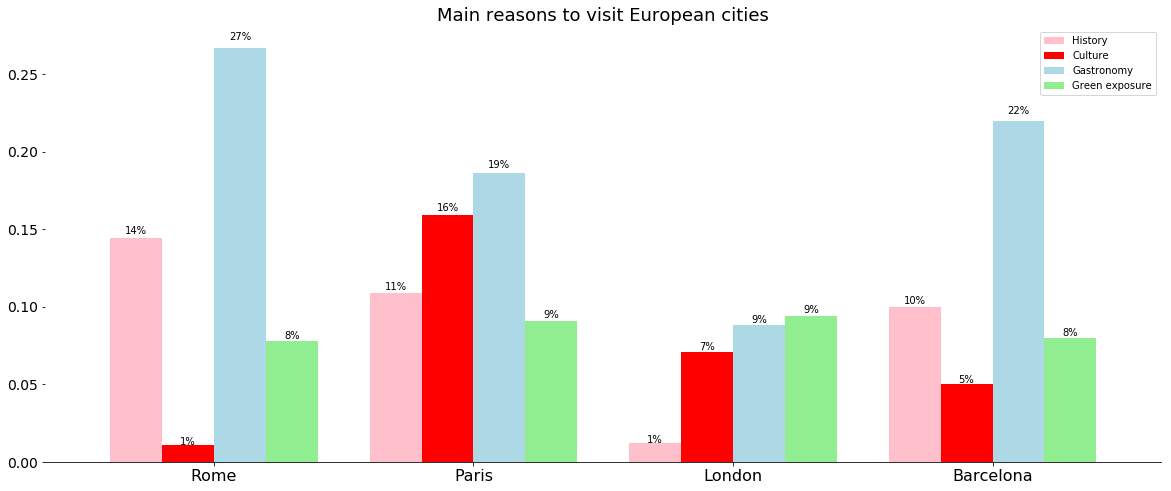

In [143]:
# The code was removed by Watson Studio for sharing.